In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [8]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline
from matplotlib import pyplot as plt

### Data Analysis

In [9]:
color = sns.color_palette()
sns.set_style('darkgrid')

teamData = pd.read_csv("teamData.csv")
teamData.drop(['G_value_batting'], axis=1, inplace=True)

In [10]:
print(teamData.head())

     W_L  IP_value_pitching  GS_value_pitching  R_value_pitching  \
0  0.321             1417.1                162               893   
1  0.547             1410.2                161               656   
2  0.321             1402.0                162               956   
3  0.568             1419.0                162               749   
4  0.438             1412.2                162               839   

   RA9_value_pitching  RA9opp_value_pitching  RA9def_value_pitching  \
0                5.67                   4.75                  -0.24   
1                4.19                   4.66                   0.27   
2                6.14                   4.90                  -0.20   
3                4.75                   4.86                   0.10   
4                5.35                   4.61                   0.20   

   RA9role_value_pitching  RA9extras_value_pitching  PPFp_value_pitching  ...  \
0                    0.00                      0.08                100.5  ...   
1 


 mu = 0.50 and sigma = 0.09



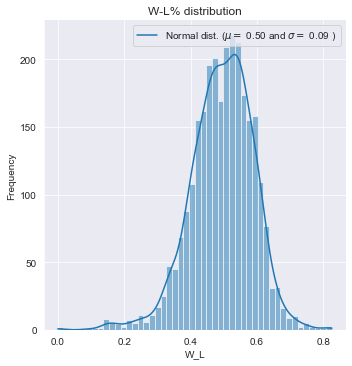

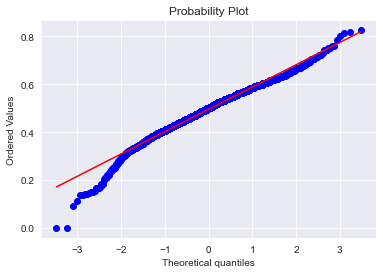

In [11]:
sns.displot(x = 'W_L', data=teamData, kde=True)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(teamData['W_L'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('W-L% distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(teamData['W_L'], plot=plt)
plt.show()

In [13]:
teamData.describe().transpose()[['mean', 'std']]

,mean,std
W_L,0.495475,0.093941
IP_value_pitching,1273.998412,357.558066
GS_value_pitching,142.832551,39.354669
R_value_pitching,638.505955,189.024009
RA9_value_pitching,4.635756,0.944269
RA9opp_value_pitching,4.572486,0.511185
RA9def_value_pitching,0.002116,0.267583
RA9role_value_pitching,-0.000018,0.002875
RA9extras_value_pitching,0.001148,0.016953
PPFp_value_pitching,100.136990,3.982709


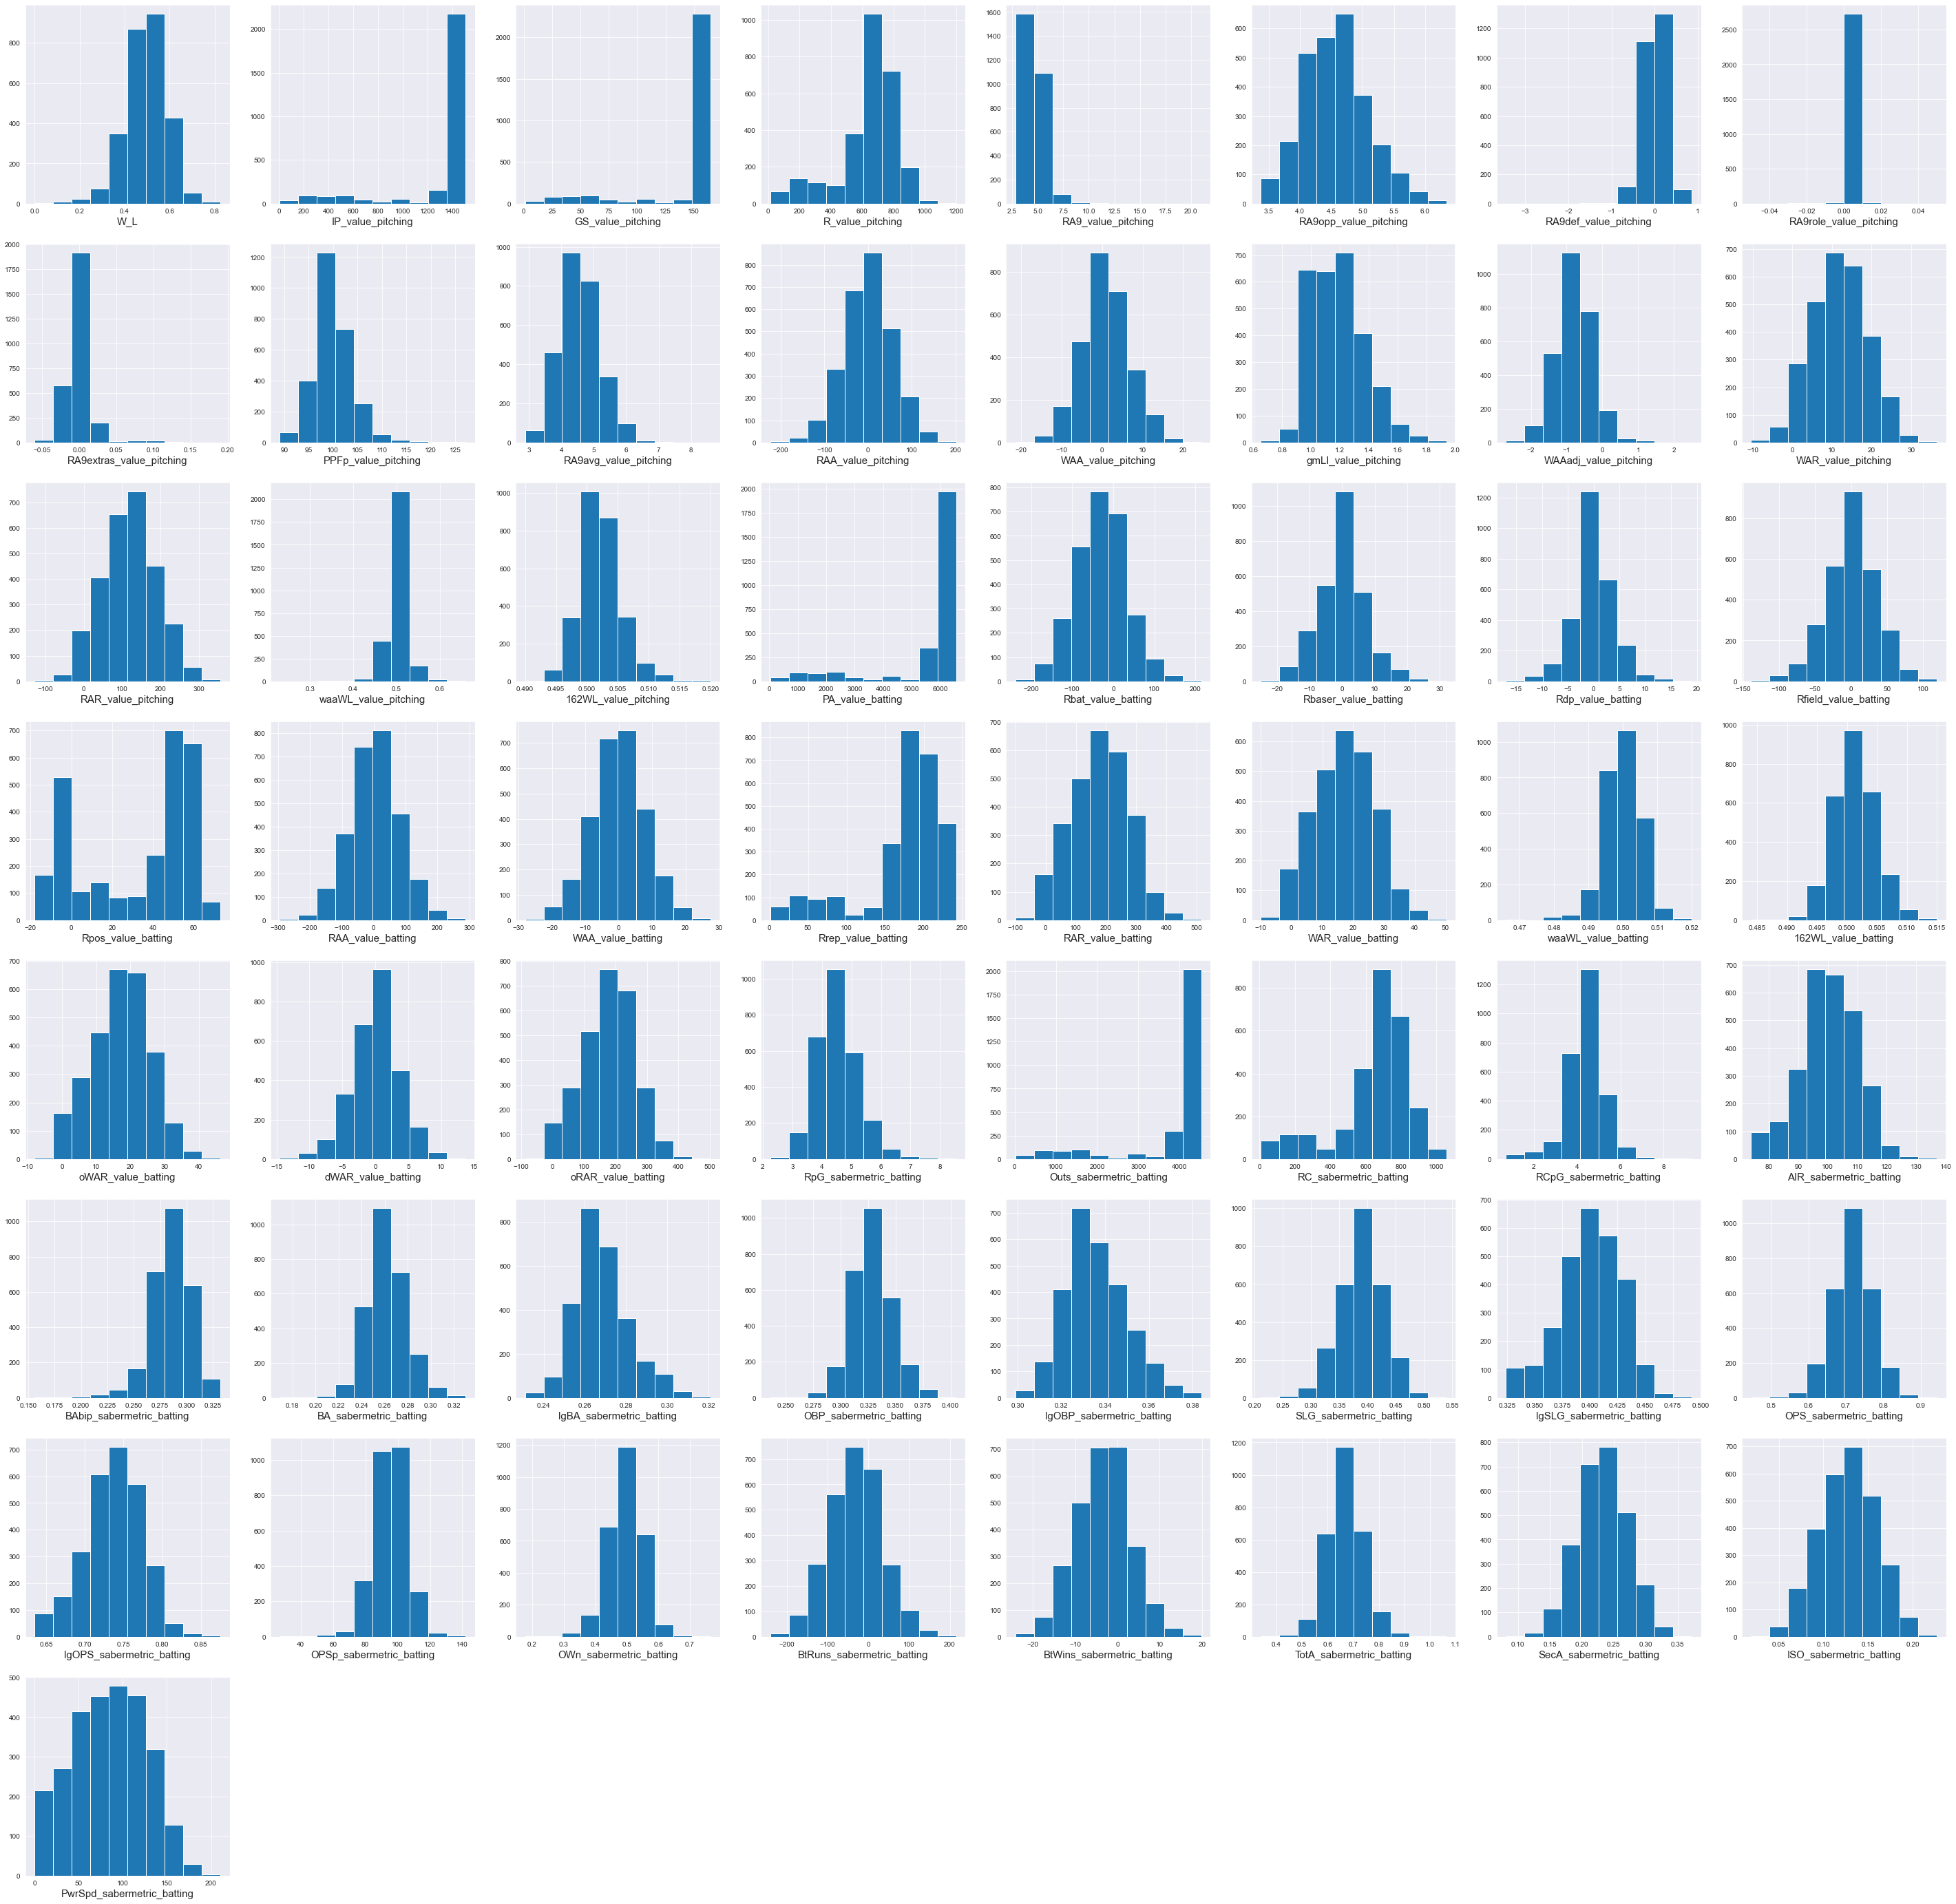

In [14]:
plt.figure(figsize=(50,50))
for index, name in enumerate(teamData.columns):
    plt.subplot(8,8,index+1)
    plt.hist(teamData[name])
    plt.xlabel(name, size=15)

In [15]:
# Removing columns with bad data
teamData = teamData.drop(teamData[(teamData['IP_value_pitching']<1300)].index)
teamData = teamData.drop(teamData[(teamData['GS_value_pitching']<150)].index)
teamData = teamData.drop(teamData[(teamData['PA_value_batting']<5500)].index)
teamData = teamData.drop(teamData[(teamData['Outs_sabermetric_batting']<3500)].index)

trainData = teamData.sample(frac=0.8, random_state=0)
testData = teamData.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()

trainLabels = trainFeatures.pop('W_L')
testLabels = testFeatures.pop('W_L')

### Normalization/Scaling

In [16]:
# Normalization Imports
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [18]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(trainFeatures))

### Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(normalizer(trainFeatures))
pcaTrainFeaturesDF = pd.DataFrame(pca.transform(normalizer(trainFeatures)), index=trainFeatures.index)
pcaTestFeaturesDF = pd.DataFrame(pca.transform(normalizer(testFeatures)), index=testFeatures.index)

             0         1         2         3         4
1480 -8.280179 -5.911944 -2.974602 -2.661191  1.081910
663   7.739419  1.052527  2.501703 -1.151457  0.761839
508   1.731655  0.639591 -0.974159 -1.341304  2.632173
99   -6.409840  3.093164  1.659890 -2.892900  0.391759
577  -0.409489  2.809171  1.210307 -1.589812  1.861797


<AxesSubplot:xlabel='0', ylabel='1'>

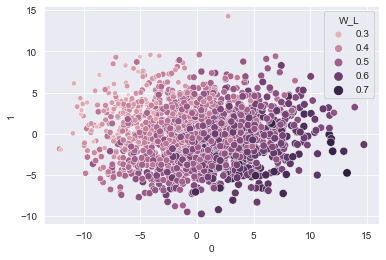

In [20]:
print(pcaTrainFeaturesDF.head())
sns.scatterplot(x = pcaTrainFeaturesDF[0],
                y = pcaTrainFeaturesDF[1],
                hue = trainLabels,
                size = trainLabels)

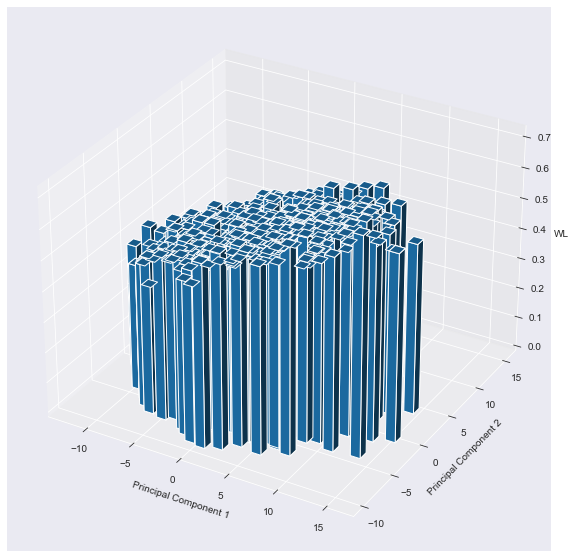

In [21]:
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(111, projection='3d')

x3 = pcaTrainFeaturesDF[0]
y3 = pcaTrainFeaturesDF[1]
z3 = np.zeros(len(trainLabels))

dx = np.ones(len(trainLabels))
dy = np.ones(len(trainLabels))
dz = trainLabels

ax1.bar3d(x3, y3, z3, dx, dy, dz)

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('WL')

plt.show()

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [W-L%]')
    plt.legend()
    plt.grid(True)

### Building the Model

In [23]:
def buildModel():
    model = keras.Sequential([
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [24]:
nn = buildModel()

In [25]:
checkpoint_name = 'bestWeigthsFinal.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [26]:
history = nn.fit(pcaTrainFeaturesDF, trainLabels, epochs=100, batch_size=64, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
 1/23 [>.............................] - ETA: 8s - loss: 0.6372
Epoch 1: val_loss improved from inf to 0.19072, saving model to bestWeigthsFinal.hdf5
23/23 [==============================] - 1s 8ms/step - loss: 0.2866 - val_loss: 0.1907
Epoch 2/100
 1/23 [>.............................] - ETA: 0s - loss: 0.1898
Epoch 2: val_loss improved from 0.19072 to 0.13305, saving model to bestWeigthsFinal.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.1493 - val_loss: 0.1331
Epoch 3/100
 1/23 [>.............................] - ETA: 0s - loss: 0.1081
Epoch 3: val_loss improved from 0.13305 to 0.10598, saving model to bestWeigthsFinal.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.1091 - val_loss: 0.1060
Epoch 4/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0873
Epoch 4: val_loss improved from 0.10598 to 0.08875, saving model to bestWeigthsFinal.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss:

Epoch 35/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0247
Epoch 35: val_loss improved from 0.03066 to 0.03021, saving model to bestWeigthsFinal.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.0302
Epoch 36/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0191
Epoch 36: val_loss did not improve from 0.03021
23/23 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.0308
Epoch 37/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0231
Epoch 37: val_loss improved from 0.03021 to 0.02993, saving model to bestWeigthsFinal.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0299
Epoch 38/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0225
Epoch 38: val_loss did not improve from 0.02993
23/23 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0305
Epoch 39/100
 1/23 [>.............................] - ETA: 0s - lo

Epoch 73/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0221
Epoch 73: val_loss did not improve from 0.02819
23/23 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0286
Epoch 74/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0195
Epoch 74: val_loss did not improve from 0.02819
23/23 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.0292
Epoch 75/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0201
Epoch 75: val_loss did not improve from 0.02819
23/23 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0305
Epoch 76/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0179
Epoch 76: val_loss did not improve from 0.02819
23/23 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0291
Epoch 77/100
 1/23 [>.............................] - ETA: 0s - loss: 0.0198
Epoch 77: val_loss did not improve from 0.02819
23/23 [====================

In [27]:
bestWeights = 'bestWeigthsFinal.hdf5' # choose the best checkpoint 
nn.load_weights(bestWeights) # load it
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

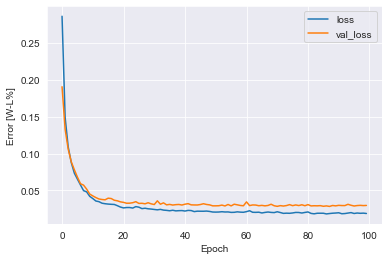

In [28]:
plot_loss(history)

### Testing the Model

In [29]:
test_results = {}
test_results['NN'] = (nn.evaluate(pcaTestFeaturesDF, testLabels))[0]
print(test_results)

15/15 [==============================] - 0s 817us/step - loss: 0.0014 - mean_squared_error: 0.0014  
{'NN': 0.0014144462766125798}


In [30]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
predictions = nn.predict(pcaTestFeaturesDF)
expected = testLabels
print(mean_absolute_error(expected, predictions), median_absolute_error(expected, predictions), mean_squared_error(expected, predictions))

for i, e in enumerate(expected[:10]):
    print("Predicted: {0:.3f} Expected: {1:.3f}".format(predictions[i][0], e))

0.029597900468176536 0.025222456932067816 0.0014144462433623808
Predicted: 0.559 Expected: 0.568
Predicted: 0.523 Expected: 0.494
Predicted: 0.619 Expected: 0.660
Predicted: 0.555 Expected: 0.556
Predicted: 0.615 Expected: 0.617
Predicted: 0.586 Expected: 0.574
Predicted: 0.625 Expected: 0.667
Predicted: 0.604 Expected: 0.562
Predicted: 0.504 Expected: 0.494
Predicted: 0.449 Expected: 0.451


In [31]:
trainLabels.std()

0.07911602177258488

In [32]:
print(162 * mean_absolute_error(expected, predictions))

4.794859875844598
